## Regresión lineal con mínimos cuadrados ordinarios (OLS)

La regresión lineal por mínimos cuadrados ordinarios (OLS, por sus siglas en inglés: *Ordinary Least Squares*) es uno de los modelos estadísticos más utilizados para **explicar la relación entre una variable dependiente y una o más variables independientes**.

En su forma más simple, OLS asume una relación lineal entre los predictores y la respuesta, y busca encontrar la línea (o hiperplano) que **minimiza la suma de los errores al cuadrado** entre las predicciones del modelo y los valores observados.

---

### Forma general del modelo

\begin{equation}
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \varepsilon_i
\end{equation}

donde,

- $y_i$: valor observado de la variable dependiente para la observación $i$. 
- $x_{ij}$: valor del predictor $j$ en la observación $i$.  
- $\beta_j$: coeficientes del modelo (parámetros estimados)  
- $\varepsilon_i$: término de error (ruido no explicado por el modelo)  

El objetivo del modelo es encontrar los valores de $\beta_0, \beta_1, \dots, \beta_p$ que **mejor ajustan** los datos, minimizando la suma de errores al cuadrado o residuos:

\begin{equation}
\sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}

donde $\hat{y}_i$ son los valores predichos por dicho modelo

---

### ¿Qué permite hacer OLS?

- Estimar el efecto individual de cada predictor sobre la variable respuesta.
- Realizar **inferencia estadística** sobre los coeficientes (valores p, intervalos de confianza).
- Evaluar la **bondad de ajuste** del modelo (mediante $R^2$, AIC, BIC).
- Diagnosticar supuestos fundamentales como **linealidad, normalidad de errores, homocedasticidad y no autocorrelación (multicolinealidad)**.

---

### Supuestos del modelo OLS

1. Linealidad en los parámetros.
2. Independencia de los errores.
3. Homocedasticidad (varianza constante de los errores).
4. Normalidad de los errores (para inferencia).
5. No multicolinealidad severa entre los predictores.


## Importación de librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Importa el submodulo pyplot de la biblioteca matplotlib para visualización de datos.
# Se utiliza comúnmente para crear histogramas, diagramas de dispersión, gráficos de líneas, cajas, barras, etc.

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# semilla aleatoria para numpy
np.random.seed(42)

## Creación de datos ficticios

Creamos unos datos ficticios con dispersión utilizando la librería de `numpy`.

In [33]:
# datos ficticios
n_sample = 100
x = np.linspace(0,10,n_sample) # min, max, numero de puntos
X = np.column_stack((x,x**2.0)) # crea una tupla de valores (x,x**2) en forma de columna
beta = np.array([1,0.1,10]) # factores beta, puestos a mano
e = np.random.normal(0,20,size=n_sample) # crea n_sample valores pesados por una distribución gaussiana (o normal) con entradas (media, des estandar, numero de puntos).
# Un error normalmente se comporta de manera gaussiana.

In [34]:
# Le agregamos un intercept
X = sm.add_constant(X)

# Creamos variable dependiente ficticia
y = np.dot(X, beta) + e # ecuación de una recta

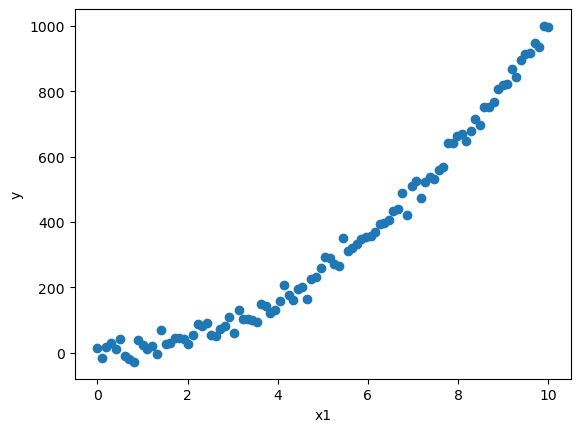

In [35]:
# Hacemos un plot rápido de estos datos generados de manera aleatoria

plt.scatter(X[:,1],y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

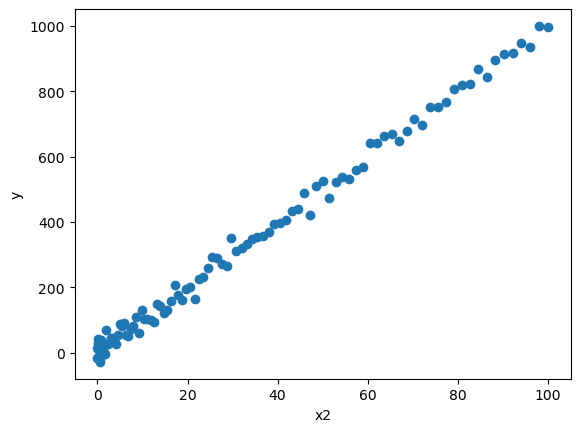

In [36]:
plt.scatter(X[:,2],y)
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

Como podemos ver, para ambas variables de entrada tenemos dos dependencias diferentes, y se puede observar el error gaussiano que metimos a mano.

## Aplicación de la regresión lineal OLS

In [37]:
model = sm.OLS(y,X) # datos directamente de arrays
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9929.
Date:                Wed, 28 May 2025   Prob (F-statistic):          6.38e-113
Time:                        22:49:33   Log-Likelihood:                -446.33
No. Observations:                 100   AIC:                             898.7
Df Residuals:                      97   BIC:                             906.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3046      6.270      1.644      0.104      -2.139      22.748
x1            -3.9210      2.898     -1.353      0.179      -9.672       1.830
x2            10.3368      0.280     36.865      0.000       9.780      10.893
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.098
Skew:                          -0.006   Prob(JB):                        0.952
Kurtosis:                       2.847   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print("R2", res.rsquared)

R2 0.9951392956356699


Observamos que el coeficiente de R2 es muy cercano a 1.o, por la forma en cómo creamos nuestros datos. Esto pasa aunque una de sus variables no es lineal, como se puede ver en los gráficos generados. Por ejemplo, si hicieramos unicamente regresion sobre cada una de las entradas de X, por separado,

In [41]:
model_1 = sm.OLS(y,X[:,1]) # datos directamente de arrays
res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1441.
Date:                Wed, 28 May 2025   Prob (F-statistic):                    8.35e-61
Time:                        22:53:22   Log-Likelihood:                         -616.04
No. Observations:                 100   AIC:                                      1234.
Df Residuals:                      99   BIC:                                      1237.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            75.5323      1.990     37.958      0.000      71.584      79.481
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.689
Skew:                           1.053   Prob(JB):                     8.74e-05
Kurtosis:                       3.220   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model_2 = sm.OLS(y,X[:,2]) # datos directamente de arrays
res_2 = model_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.452e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):                   3.43e-133
Time:                        22:53:38   Log-Likelihood:                         -447.71
No. Observations:                 100   AIC:                                      897.4
Df Residuals:                      99   BIC:                                      900.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.0191      0.047    211.004      0.000       9.925      10.113
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.128
Skew:                          -0.014   Prob(JB):                        0.938
Kurtosis:                       2.827   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos, como es de esperarse, que la variable $x_2$ es la más lineal con respecto a $y$, y por tanto explica mejor los datos con un R2 de 0.998.

## OLS sobre una curva no-lineal, pero sí lineal en parámetros

In [70]:
# modificamos un poco los datos ficticios generados
n_sample = 100
sigma = 0.5
x = np.linspace(0,20,n_sample) 
X = np.column_stack((x,np.sin(x), (x-5.0)**2.0, np.ones(n_sample))) # se agregan nuevas entradas no lineales
beta = np.array([0.5,0.5,-0.02,5.0]) # se toman otros coeficientes beta
e = sigma * np.random.normal(size=n_sample) # se modifica un poco el ruido gaussiano

y = np.dot(X, beta) + e 
y_true = np.dot(X, beta) # unos datos y de referencia sin error 

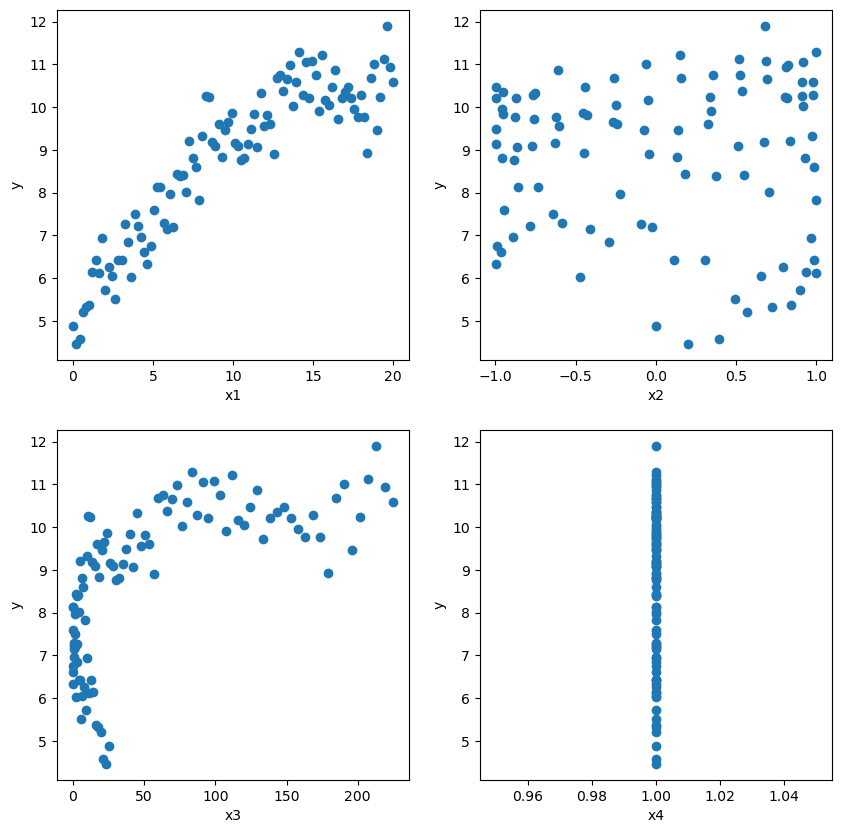

In [71]:
# Hacemos unos gráficos para visualizar sus tendencias

fig = plt.figure(figsize=(10,10))

# panel 1
ax1 = fig.add_subplot(221)
ax1.scatter(X[:,0], y)
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# panel 2
ax2 = fig.add_subplot(222)
ax2.scatter(X[:,1], y)
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

# panel 3
ax2 = fig.add_subplot(223)
ax2.scatter(X[:,2], y)
ax2.set_xlabel('x3')
ax2.set_ylabel('y')

# panel 4
ax2 = fig.add_subplot(224)
ax2.scatter(X[:,3], y)
ax2.set_xlabel('x4')
ax2.set_ylabel('y')

plt.show()

In [72]:
# aplicamos modelo
model_2 = sm.OLS(y,X)
res_2 = model_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     380.7
Date:                Wed, 28 May 2025   Prob (F-statistic):           3.78e-53
Time:                        23:39:16   Log-Likelihood:                -74.539
No. Observations:                 100   AIC:                             157.1
Df Residuals:                      96   BIC:                             167.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4855      0.020     24.665      0.000       0.446       0.525
x2             0.4059      0.076      5.336      0.000       0.255       0.557
x3            -0.0196      0.002    -11.342      0.000      -0.023      -0.016
const          5.0757      0.128     39.765      0.000       4.822       5.329
==============================================================================
Omnibus:                        0.771   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.655
Skew:                          -0.197   Prob(JB):                        0.721
Kurtosis:                       2.956   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
print("Parameters :", res_2.params)
print("Std Errors: ", res_2.bse)
print("Pred Values: ", res_2.predict())
print("R Squared: ", res_2.rsquared)

Parameters : [ 0.48554244  0.40589329 -0.01961908  5.07570256]
Std Errors:  [0.01968558 0.0760731  0.00172981 0.12764124]
Pred Values:  [ 4.58522568  4.80359089  5.01704216  5.2224017   5.41675569  5.59757281
  5.7628072   5.91098168  6.04124779  6.15342038  6.24798506  6.32607849
  6.38944215  6.44035147  6.48152335  6.51600557  6.54705289  6.57799465
  6.61209933  6.65244165  6.70177746  6.76243172  6.83620385  6.92429461
  7.02725724  7.14497495  7.27666565  7.42091381  7.57572802  7.73862194
  7.9067155   8.07685199  8.24572647  8.41002021  8.56653564  8.71232645
  8.8448174   8.96190905  9.06206318  9.14436536  9.2085621   9.2550712
  9.28496477  9.29992555  9.30217855  9.2944005   9.27961102  9.26104973
  9.24204457  9.22587638  9.21564548  9.21414556  9.22375007  9.24631565
  9.28310665  9.33474367  9.40117835  9.48169533  9.5749413   9.67898013
  9.79137154  9.9092704  10.02954243 10.1488917  10.26399467 10.37163539
 10.46883626 10.55297922 10.62191214 10.67403643 10.70837203 1

### Intervalos de confianza de las predicciones

Al hacer predicciones con un modelo de regresión, no solo nos interesa obtener un valor puntual para la variable respuesta, sino también **cuánta incertidumbre hay en esa predicción**. Para esto utilizamos **intervalos de confianza** y **bandas de predicción**.

Un **intervalo de confianza** nos indica un rango dentro del cual esperamos que se encuentre el valor **promedio esperado** de la variable dependiente, dado un conjunto específico de valores para los predictores.

Por ejemplo, si predecimos el ingreso promedio para personas con cierto nivel educativo, el intervalo de confianza indica el rango donde podría encontrarse ese promedio, considerando la variabilidad en los datos y la incertidumbre en la estimación de los coeficientes del modelo.

---

Diferente del intervalo de confianza del **promedio**, la **banda de predicción** nos dice en qué rango esperamos que caiga una **nueva observación individual**, es decir, una persona específica con esos valores de entrada.

La banda de predicción siempre será más ancha que el intervalo de confianza, ya que incluye no solo la incertidumbre del modelo, sino también la variabilidad inherente del fenómeno que se modela.

---

La función `statsmodels.sandbox.regression.predstd.wls_prediction_std` se utiliza para calcular la **desviación estándar de las predicciones** realizadas por un modelo ajustado mediante mínimos cuadrados (OLS o WLS), así como los **intervalos de confianza** y los **intervalos de predicción** asociados a dichas predicciones.

Dado un modelo ajustado y un conjunto de valores nuevos para los regresores, esta función devuelve tres elementos:

1. `mean_se`: el error estándar de la predicción del valor medio,
2. `conf_int_lower`, `conf_int_upper`: los límites inferior y superior del intervalo de predicción (por defecto al 95%).

Esto permite representar gráficamente la incertidumbre de las predicciones, ya sea como **bandas de confianza para la media** o como **bandas de predicción para nuevas observaciones**.


In [85]:
# Hacemos una funcion para hacer un plot para comparar

def plot_compare(res):

    prstd, iv_1, iv_u = wls_prediction_std(res)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(x, y, 'o', label='data')
    ax.plot(x, y_true, 'b-', label='True')
    ax.plot(x, res.fittedvalues, 'r--', label='OLS')
    ax.plot(x, iv_u, 'g--')
    ax.plot(x, iv_1, 'g--')
    ax.legend()

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

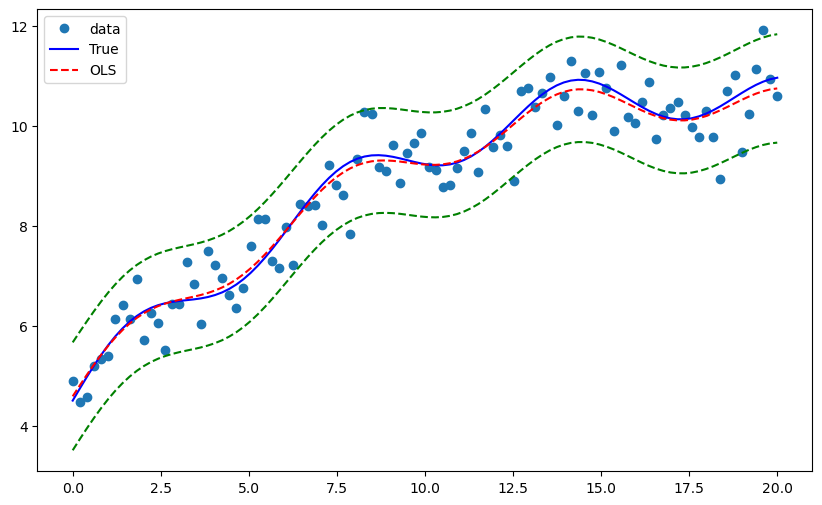

In [86]:
plot_compare(res_2)